## Importing MNIST dataset from the Keras module


In [1]:
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

2024-04-28 23:26:19.073360: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Split ration of data:

In [3]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


## We can see that there are 60k images in the training set and 10k images in the testing set.

## The dimension of our training vector is (60000, 28, 28), this is because there are 60,000 grayscale images with the dimension 28X28.

## Plotting the dataset:

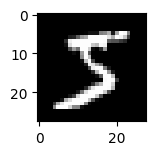

Corresponding label:5


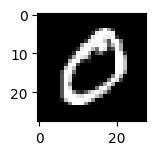

Corresponding label:0


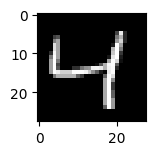

Corresponding label:4


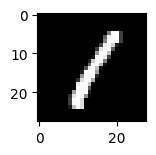

Corresponding label:1


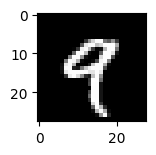

Corresponding label:9


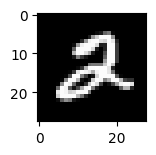

Corresponding label:2


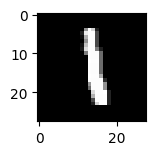

Corresponding label:1


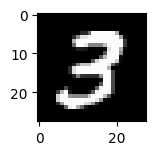

Corresponding label:3


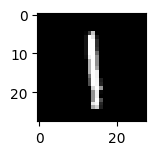

Corresponding label:1


In [4]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()
    print(f"Corresponding label:{y_train[i]}")

## Checking values of each pixel before normalization:

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalizing the data:

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


## Plotting the dataset after normalization:

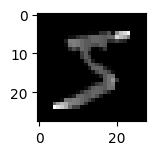

Corresponding label:5


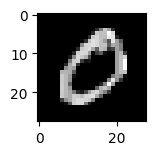

Corresponding label:0


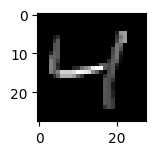

Corresponding label:4


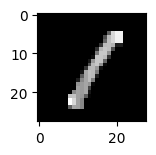

Corresponding label:1


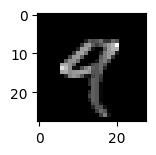

Corresponding label:9


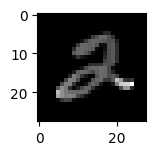

Corresponding label:2


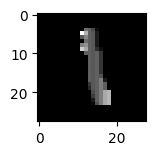

Corresponding label:1


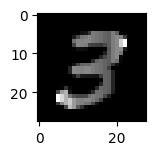

Corresponding label:3


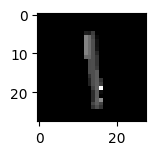

Corresponding label:1


In [7]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()
    print(f"Corresponding label:{y_train[i]}")

## Checking values of each pixel after normalization:

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resizing images to pass it to Convolutional Neural Network

In [9]:
IMG_SIZE=28
NUM_EXAMPLES_TRAIN = np.shape(x_train)[0]
NUM_EXAMPLES_TEST = np.shape(x_test)[0]
x_train_con = np.array(x_train).reshape(NUM_EXAMPLES_TRAIN, IMG_SIZE, IMG_SIZE, 1)
x_test_con = np.array(x_test).reshape(NUM_EXAMPLES_TEST, IMG_SIZE, IMG_SIZE, 1)
print(f"Training data dimension: {np.shape(x_train_con)}")
print(f"Test data dimension: {np.shape(x_test_con)}")

Training data dimension: (60000, 28, 28, 1)
Test data dimension: (10000, 28, 28, 1)


## Creating Convolutional Neural Network:

## First Model:

In [10]:
# model_1 = Sequential()

# #First Convolutional Layer
# model_1.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train_con.shape[1:])) #skipping training dataset size using [1:]
# model_1.add(Activation("relu"))
# model_1.add(MaxPooling2D(pool_size=(2,2)))

# #Second Convolutional Layer
# model_1.add(Conv2D(filters = 64, kernel_size = (3,3))) #skipping training dataset size using [1:]
# model_1.add(Activation("relu"))
# model_1.add(MaxPooling2D(pool_size=(2,2)))

# #Third Convolutional Layer
# model_1.add(Conv2D(filters = 64, kernel_size = (3,3))) #skipping training dataset size using [1:]
# model_1.add(Activation("relu"))
# model_1.add(MaxPooling2D(pool_size=(2,2)))

# # Fully Connected Layer 1
# model_1.add(Flatten()) 
# model_1.add(Dense(64))
# model_1.add(Activation("relu"))

# # Fully Connected Layer 2
# model_1.add(Dense(32))
# model_1.add(Activation("relu"))

# # Last Fully Connected Layer
# model_1.add(Dense(10))
# model_1.add(Activation("softmax"))

In [11]:
# model_1.summary()

## Compiling model:

In [12]:
# model_1.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [13]:
x_train_con.shape

(60000, 28, 28, 1)

In [14]:
# model_1.fit(x_train_con, y_train, epochs = 5, validation_split = 0.3, batch_size=32)

## Open saved model:


In [15]:
model_1 = keras.models.load_model("model_1.h5")

2024-04-28 23:12:20.551465: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-04-28 23:12:20.553306: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-04-28 23:12:20.581763: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-28 23:12:20.581919: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 960 computeCapability: 5.2
coreClock: 1.2785GHz coreCount: 8 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.46GiB/s
2024-04-28 23:12:20.581937: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-04-28 23:12:20.583731: I tensorflow/stream_executor/platform/def

In [16]:
test_loss, test_acc = model_1.evaluate(x_test_con, y_test)
print("Test Loss on 10,000 test samples:", test_loss )
print("Validation Accuracy on 10,000 test samples:", test_acc )

2024-04-28 23:12:24.920793: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-04-28 23:12:24.921218: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3199980000 Hz
2024-04-28 23:12:25.036175: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-28 23:12:25.180807: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


313/313 [==============================] - 2s 2ms/step - loss: 0.0706 - accuracy: 0.9790
Test Loss on 10,000 test samples: 0.07059400528669357
Validation Accuracy on 10,000 test samples: 0.9789999723434448


## take a look at predictions

In [17]:
predictions = model_1.predict([x_test_con])

### predictions are based on one hot encoding so these are arrays containing softmax output

In [18]:
print(predictions)

[[3.4320823e-05 9.7362313e-04 3.0817802e-04 ... 9.9866974e-01
  1.0281396e-06 2.4931344e-06]
 [5.7863165e-04 4.3463942e-06 9.9929154e-01 ... 1.1462593e-04
  4.5318575e-06 2.2279943e-07]
 [6.7038619e-09 9.9999750e-01 1.5705870e-08 ... 9.2121297e-08
  3.3455711e-07 1.9765054e-09]
 ...
 [7.2111483e-10 6.2190367e-08 3.7821564e-09 ... 7.3671970e-08
  1.7295076e-06 4.7605749e-07]
 [2.2726840e-06 2.1883259e-06 1.5109649e-07 ... 4.6224031e-08
  4.6779463e-05 2.5836794e-06]
 [2.0822110e-06 6.0018133e-09 7.7704800e-07 ... 2.1403688e-08
  2.5428710e-06 3.4951955e-09]]


### to get actuall prediction you call argmax 

In [19]:
print(np.argmax(predictions[0]))

7


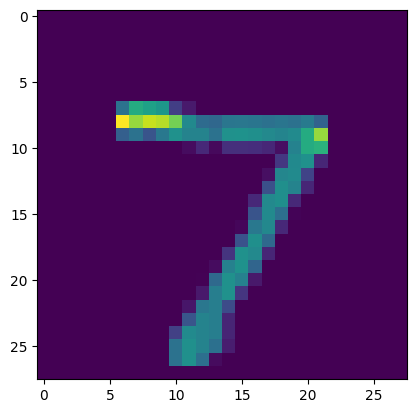

In [20]:
plt.imshow(x_test[0])

## Upload custom digit

In [51]:
import cv2

In [67]:
img_test = cv2.imread('zero.png')

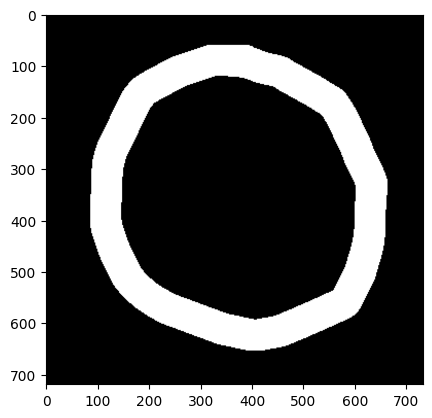

In [68]:
plt.imshow(img_test)

## Convert image to gray to fit it to the model

In [69]:
img_test_gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)

## Resize image to fit it to the model

In [70]:
#original shape
print(img_test.shape)

(719, 733, 3)


In [71]:
img_test_res = cv2.resize(img_test_gray, (28,28), interpolation = cv2.INTER_AREA)

In [72]:
#new shape
print(img_test_res.shape)

(28, 28)


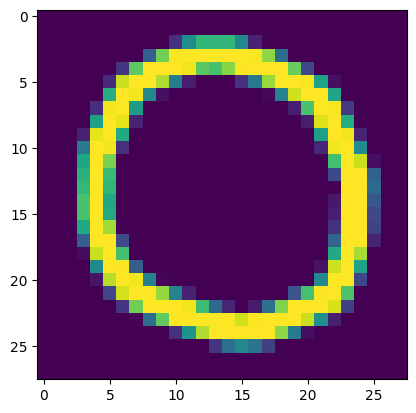

In [73]:
plt.imshow(img_test_res)

## normalize your image:

In [74]:
img_test_norm = tf.keras.utils.normalize(img_test_res, axis=1)

In [75]:
#operation to fit it to convolution layer: change shape from (28,28) to (28,28,1)
img_test_norm = np.array(img_test_norm).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [76]:
img_test_norm.shape

(1, 28, 28, 1)

## Test model on custom input:

In [77]:
prediction = model_1.predict(img_test_norm)

In [95]:
prediction[0]

array([9.0692842e-01, 2.4880566e-07, 6.0854241e-04, 2.0979959e-04,
       2.3851642e-06, 4.1959420e-06, 9.1984920e-02, 1.8208428e-05,
       2.5555630e-05, 2.1785146e-04], dtype=float32)

In [96]:
for i, prob in enumerate(prediction[0]):
    print(f"Class {i}: {prob*100:.2f}%")


Class 0: 90.69%
Class 1: 0.00%
Class 2: 0.06%
Class 3: 0.02%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 9.20%
Class 7: 0.00%
Class 8: 0.00%
Class 9: 0.02%


## Test your model on video:

In [97]:
import numpy as np

font_scale = 1.0
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture("test3.webm")
# Check if video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

paused = False  # Flag to track video pause state
frame_number = 0  # Store the frame number when pausing

while True:
    if not paused:
        ret, frame = cap.read()
        if not ret:
            break
        frame_number += 1

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
        newimg = tf.keras.utils.normalize(resized, axis=1)
        newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        predictions = model_1.predict(newimg)
        status = np.argmax(predictions)
        probabilities = predictions[0]

        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
#         cv2.rectangle(frame, (x1, x1), (x1 + w1 + 80, y1 + h1), (0, 255, 0), -1)
        # Add text for predicted value
        text = "Predicted value: " + str(status)
        text_width, text_height = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
        x_text = x1 + int(w1 / 5)
        y_text = y1 + int(h1 / 2) + int(text_height / 2)
        cv2.putText(frame, text, (x_text, y_text), font, font_scale, (0, 0, 255), 1)
        # Add text for probabilities
        for i, prob in enumerate(probabilities):
            text_prob = f"Prob {i}: {prob*100:.2f}%"
            y_text_prob = y_text + (i + 1) * 20  # Adjust spacing between probabilities
            cv2.putText(frame, text_prob, (x_text, y_text_prob), font, font_scale, (0, 0, 255), 1)

        cv2.imshow("MNIST data CNN model result video", frame)

    key = cv2.waitKey(1)
    if key == ord(' '):  # Pause/unpause video on spacebar press
        paused = not paused
        if paused:
            frame_number -= 1  # Adjust frame number to resume from the current frame
    elif key == ord('q'):
        break

    # Seek to the stored frame number if unpausing
    if not paused:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

cap.release()
cv2.destroyAllWindows()


In [101]:
import gzip
f = gzip.open('train-labels.idx1-ubyte.gz','r')
f.read(8)
for i in range(0,50):   
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    print(labels)

FileNotFoundError: [Errno 2] No such file or directory: 'train-labels.idx1-ubyte.gz'

## Load your custom data

In [2]:
import os
import cv2
import numpy as np

In [3]:
dataset_dir = "fine_tune_data"
class_names = sorted(os.listdir(dataset_dir))


In [4]:
images = []
labels = []


In [5]:
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28)) # Read image in grayscale
        images.append(image)
        labels.append(int(class_name))  # Convert class name to integer


In [6]:
x_train_custom = np.array(images)
y_train_custom = np.array(labels)


In [7]:
x_train_custom = tf.keras.utils.normalize(x_train_custom, axis=1)

In [18]:
IMG_SIZE=28
NUM_EXAMPLES_TRAIN = np.shape(x_train_custom)[0]
x_train_custom = np.array(x_train_custom).reshape(NUM_EXAMPLES_TRAIN, IMG_SIZE, IMG_SIZE, 1)

In [19]:
x_train_custom.shape

(100, 28, 28, 1)

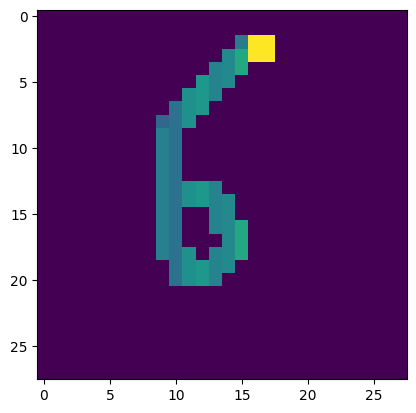

In [32]:
plt.imshow(x_train_custom[62])

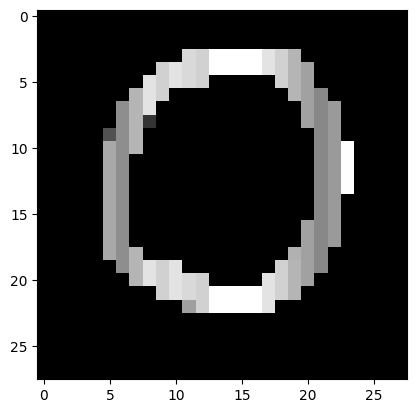

Corresponding label:0


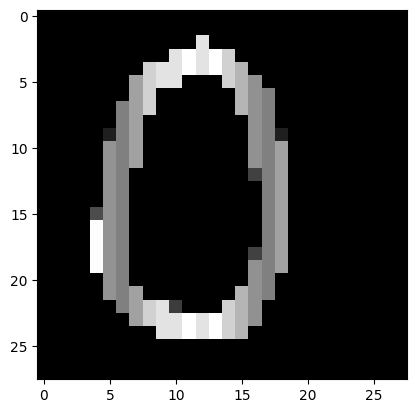

Corresponding label:0


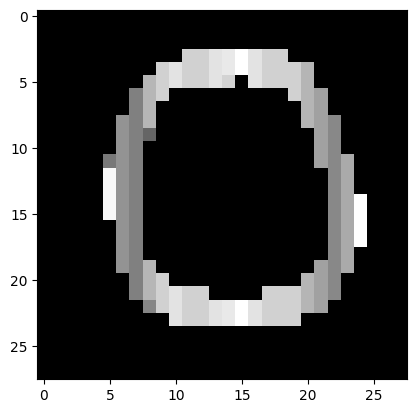

Corresponding label:0


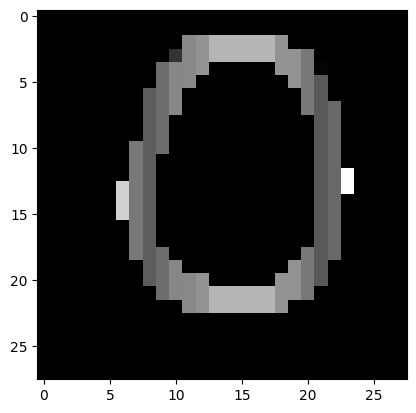

Corresponding label:0


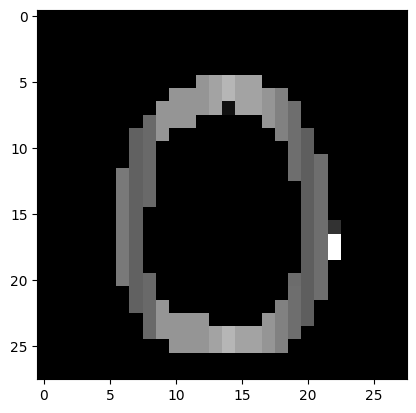

Corresponding label:0


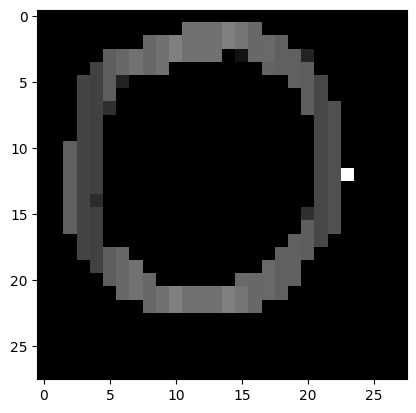

Corresponding label:0


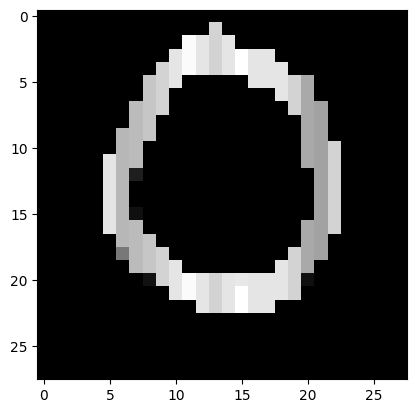

Corresponding label:0


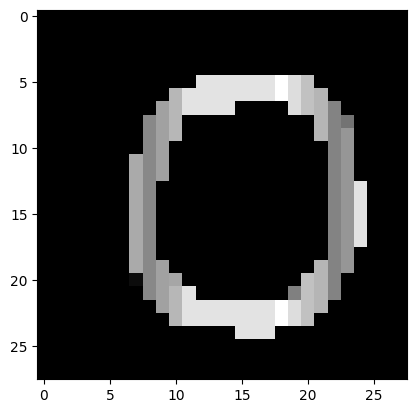

Corresponding label:0


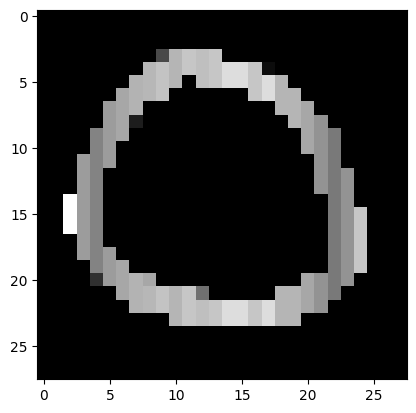

Corresponding label:0


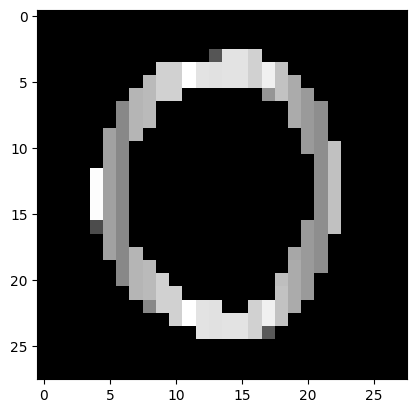

Corresponding label:0


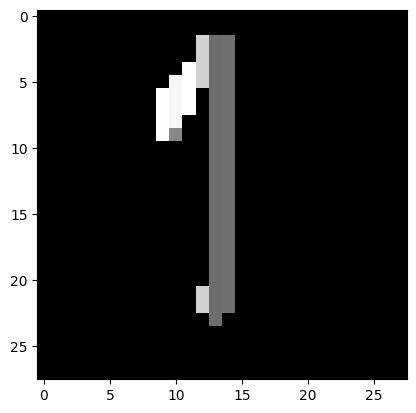

Corresponding label:1


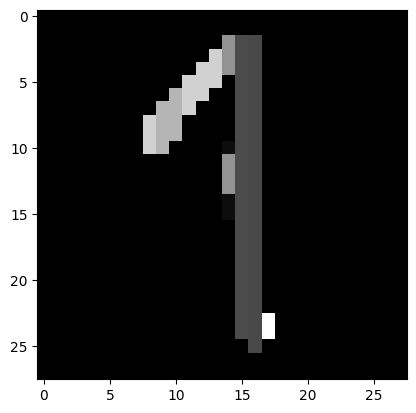

Corresponding label:1


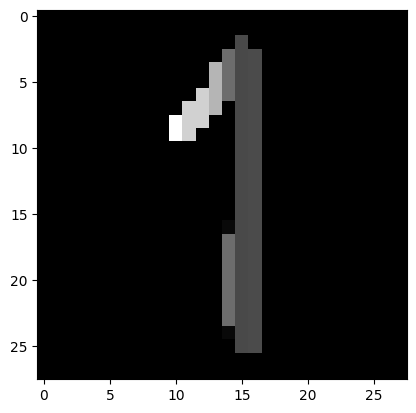

Corresponding label:1


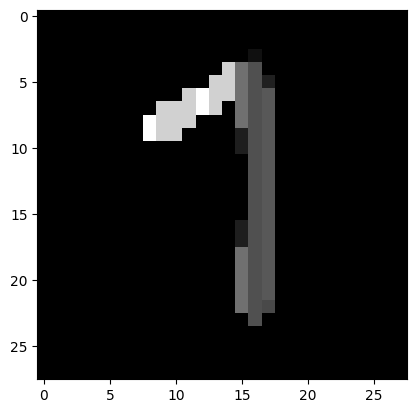

Corresponding label:1


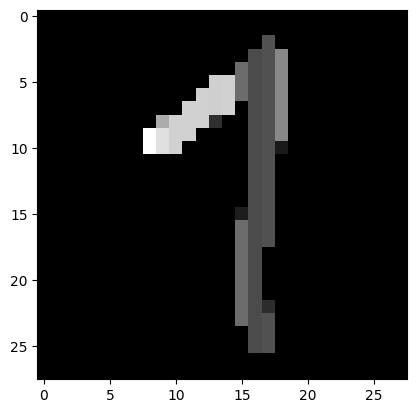

Corresponding label:1


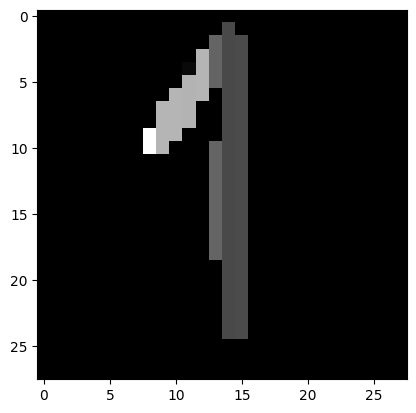

Corresponding label:1


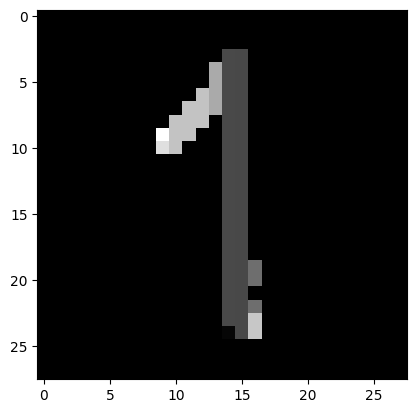

Corresponding label:1


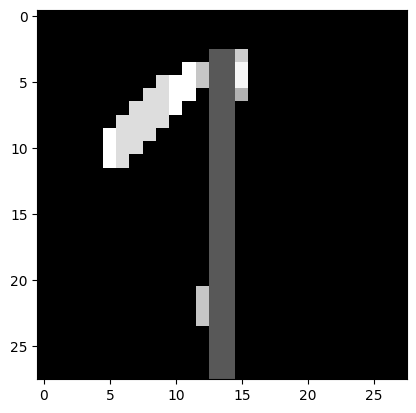

Corresponding label:1


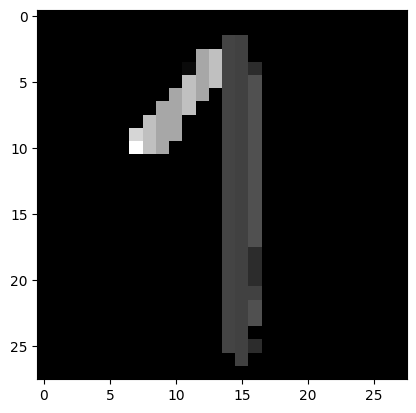

Corresponding label:1


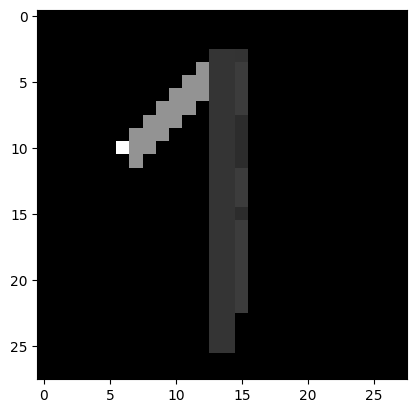

Corresponding label:1


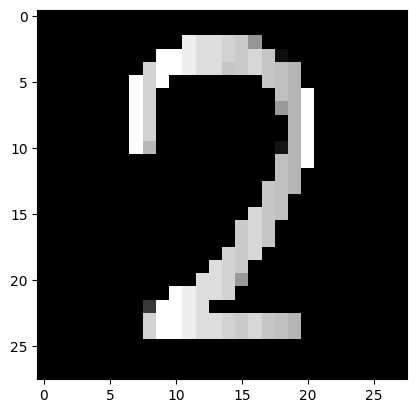

Corresponding label:2


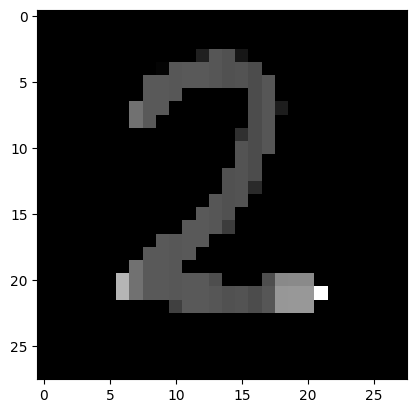

Corresponding label:2


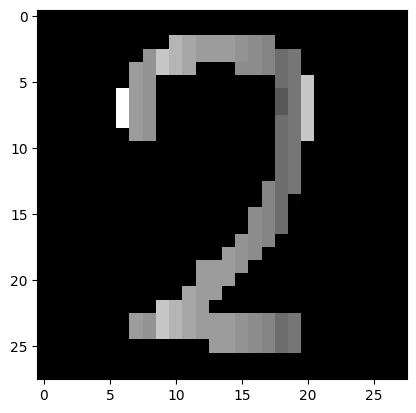

Corresponding label:2


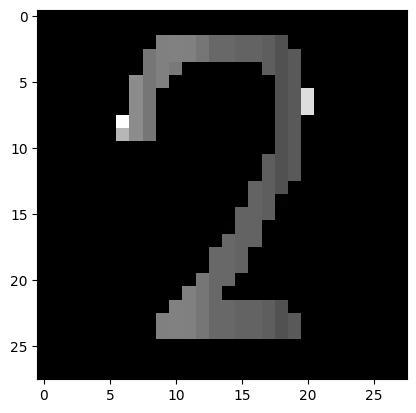

Corresponding label:2


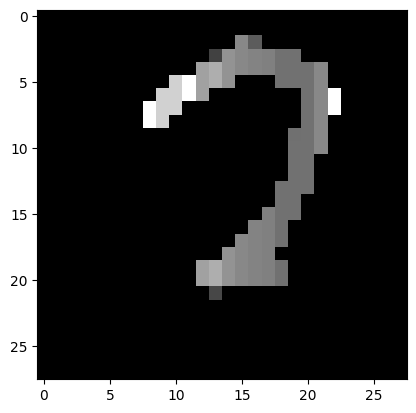

Corresponding label:2


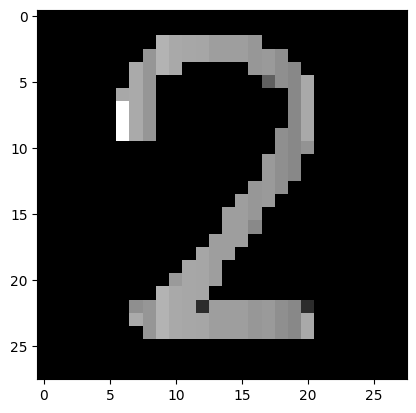

Corresponding label:2


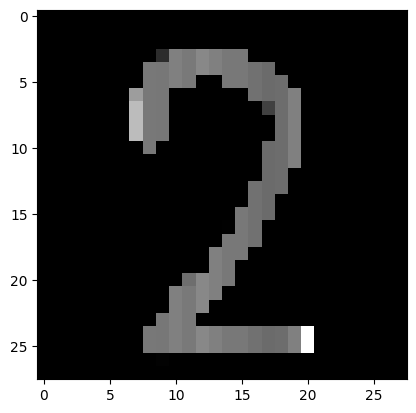

Corresponding label:2


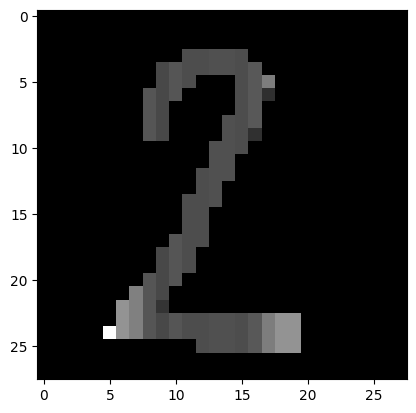

Corresponding label:2


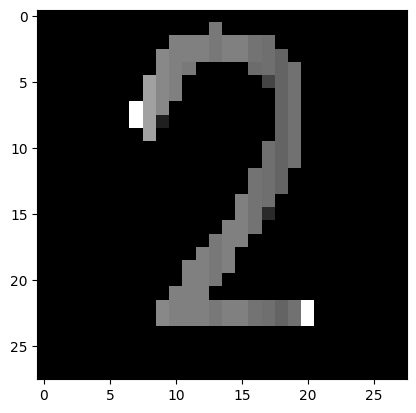

Corresponding label:2


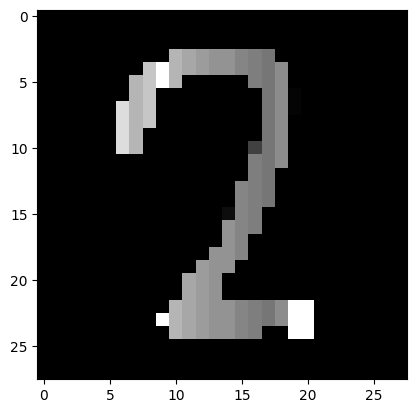

Corresponding label:2


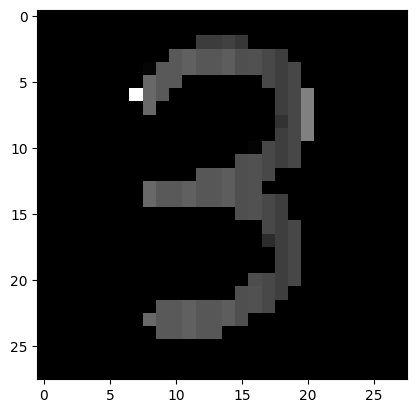

Corresponding label:3


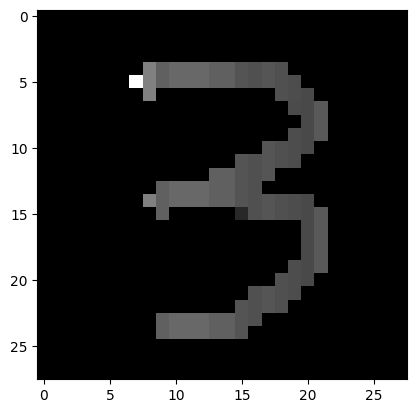

Corresponding label:3


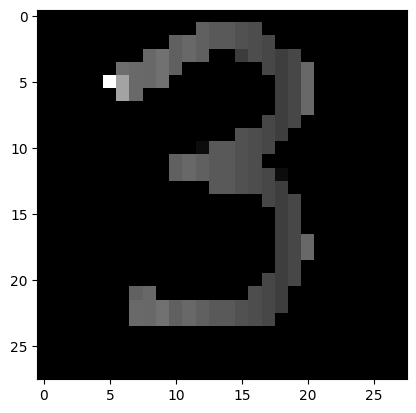

Corresponding label:3


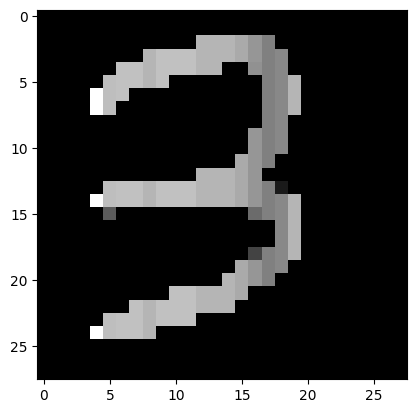

Corresponding label:3


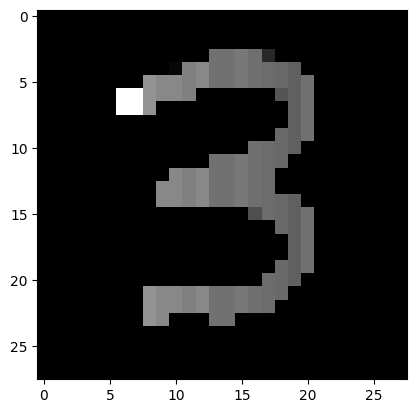

Corresponding label:3


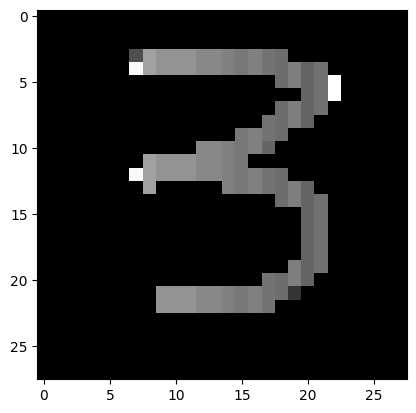

Corresponding label:3


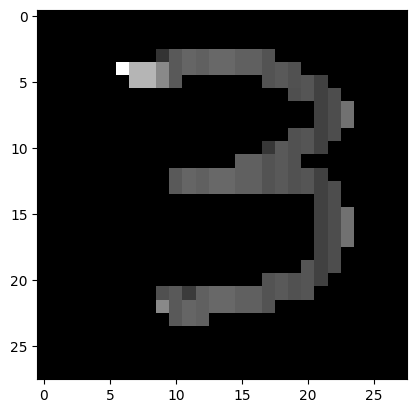

Corresponding label:3


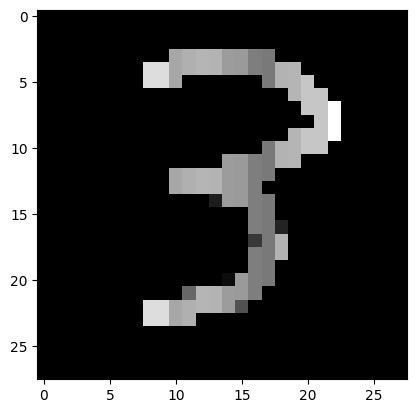

Corresponding label:3


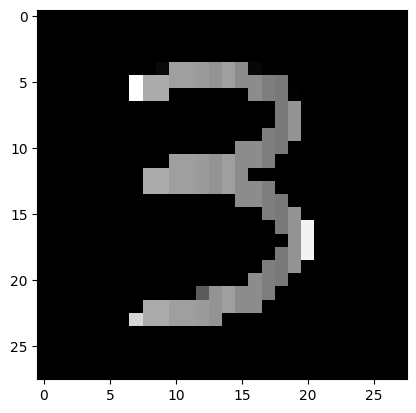

Corresponding label:3


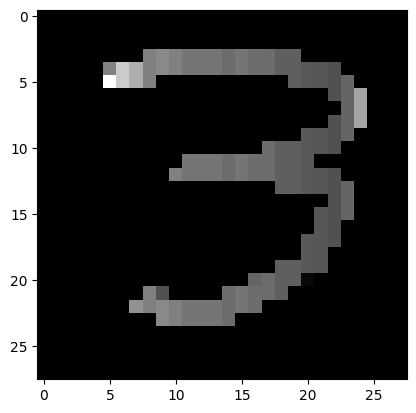

Corresponding label:3


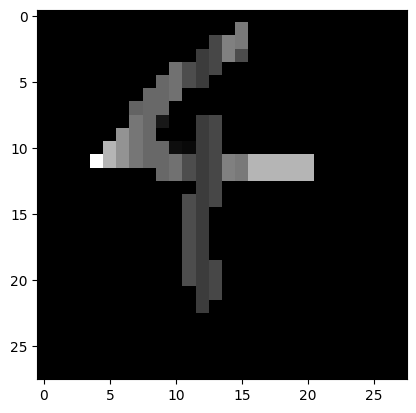

Corresponding label:4


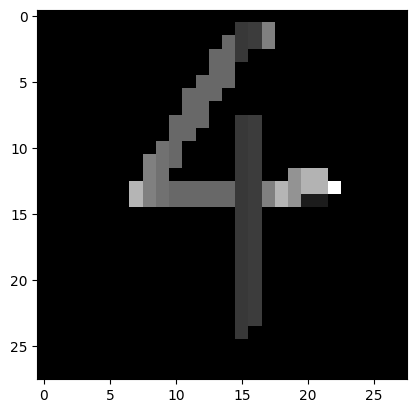

Corresponding label:4


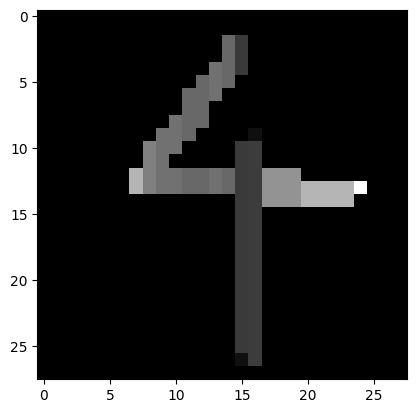

Corresponding label:4


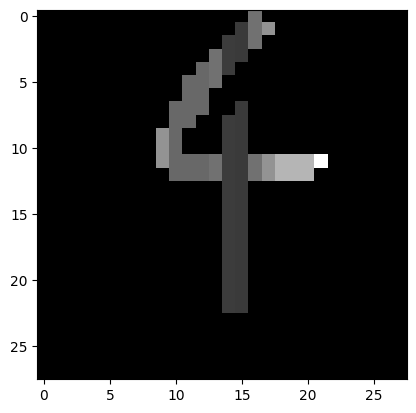

Corresponding label:4


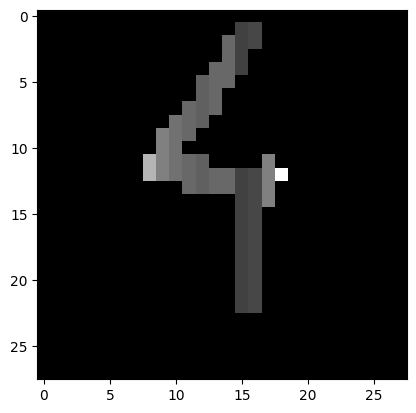

Corresponding label:4


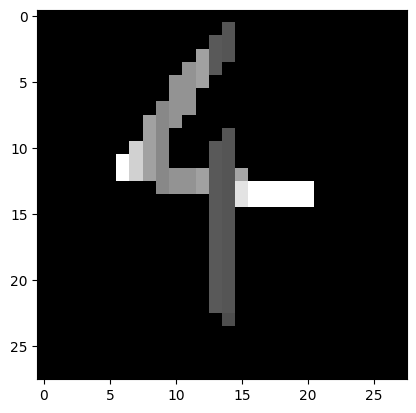

Corresponding label:4


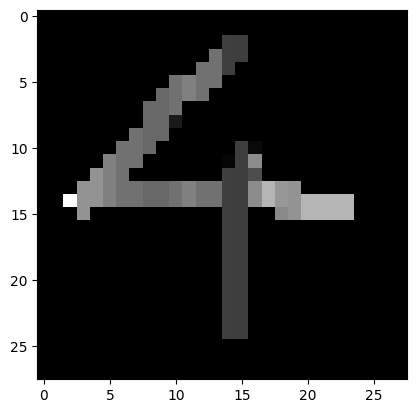

Corresponding label:4


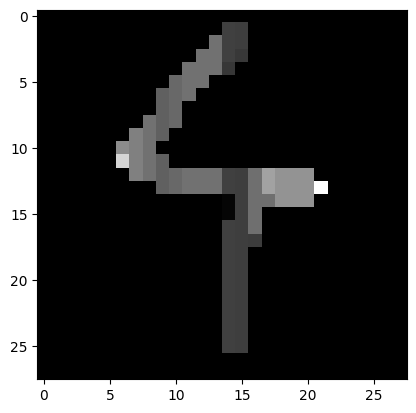

Corresponding label:4


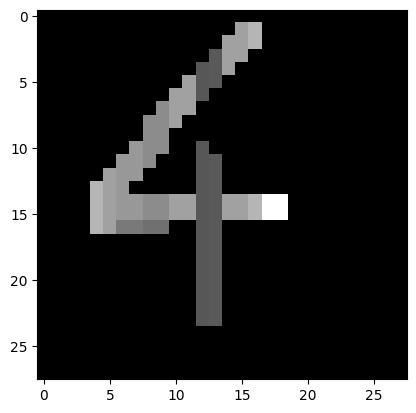

Corresponding label:4


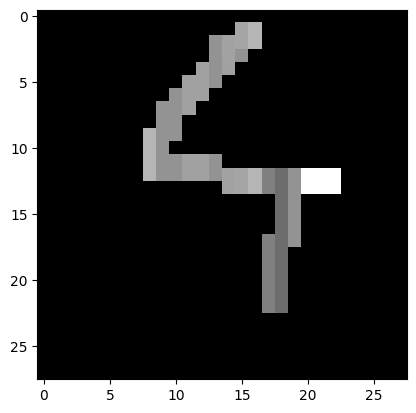

Corresponding label:4


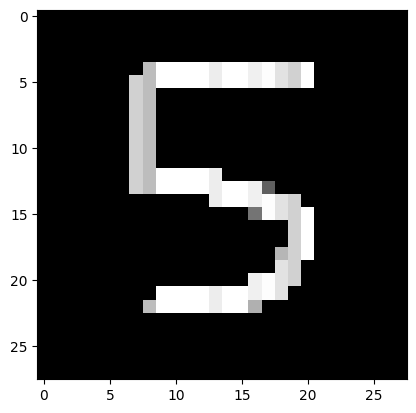

Corresponding label:5


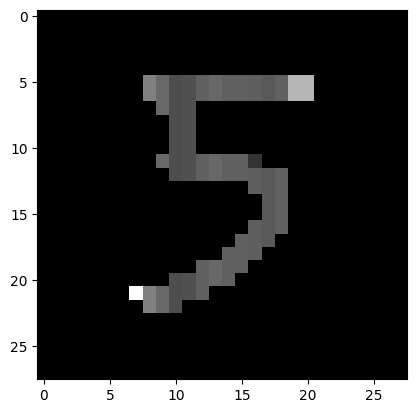

Corresponding label:5


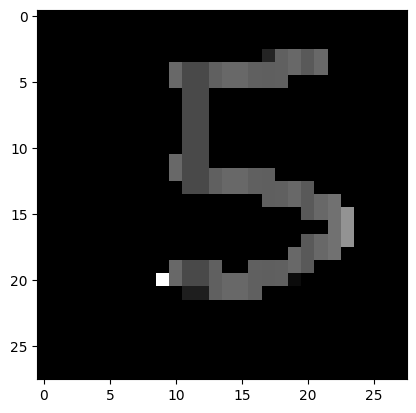

Corresponding label:5


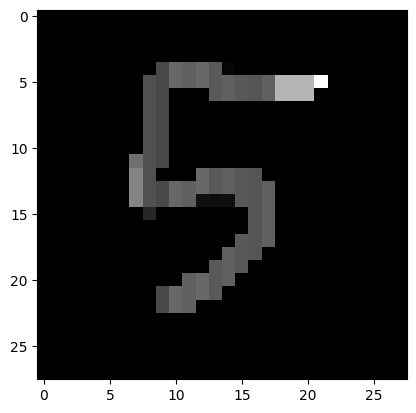

Corresponding label:5


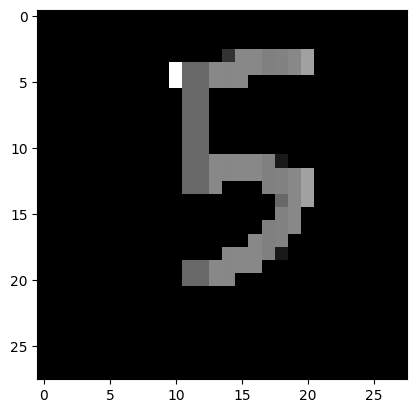

Corresponding label:5


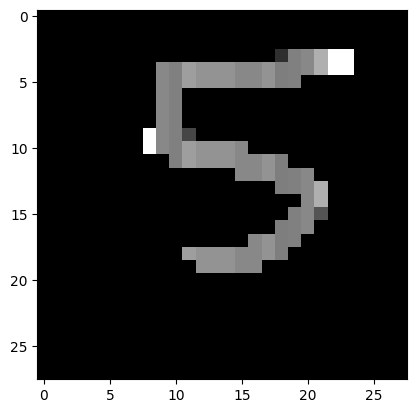

Corresponding label:5


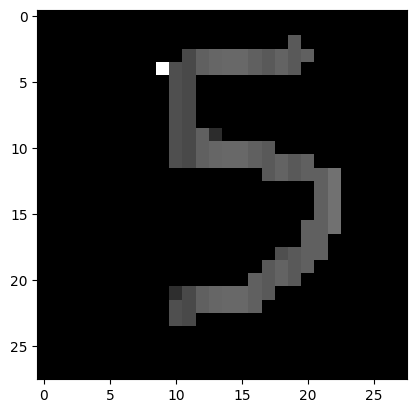

Corresponding label:5


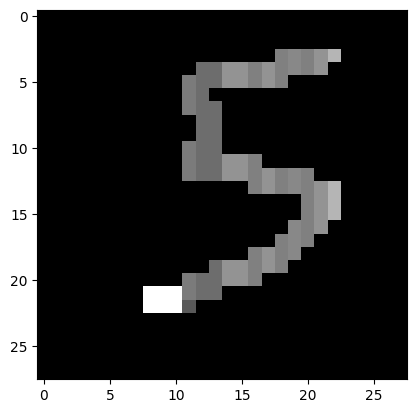

Corresponding label:5


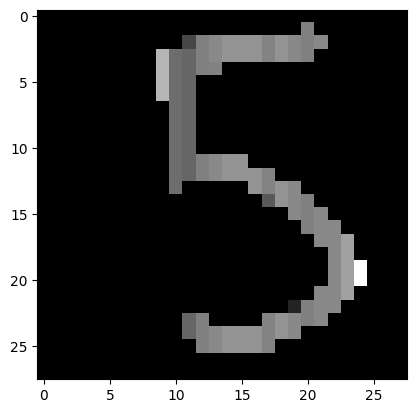

Corresponding label:5


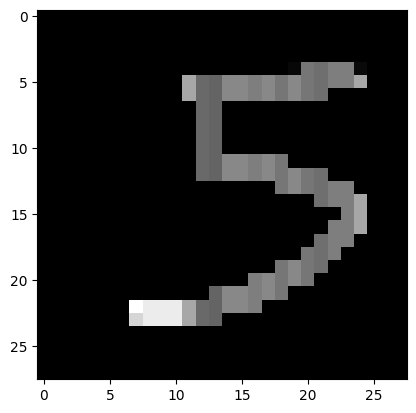

Corresponding label:5


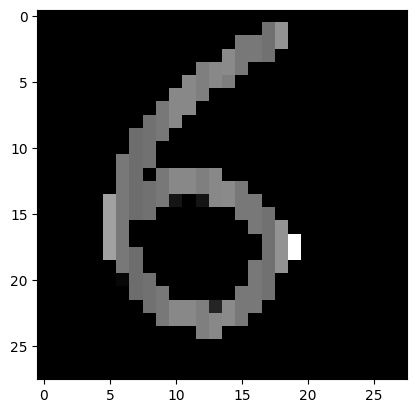

Corresponding label:6


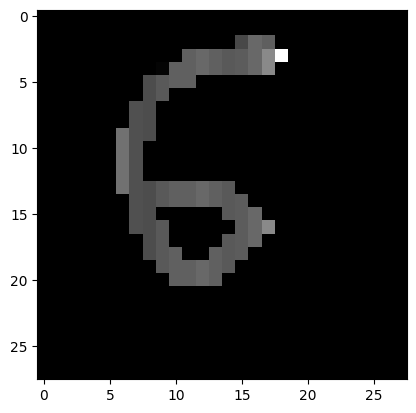

Corresponding label:6


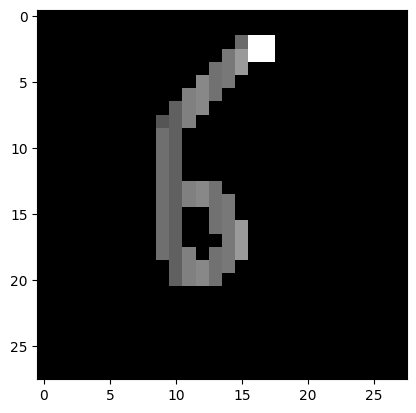

Corresponding label:6


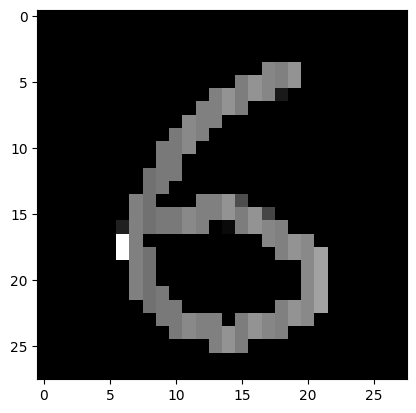

Corresponding label:6


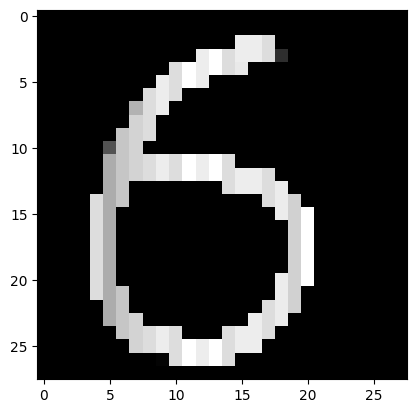

Corresponding label:6


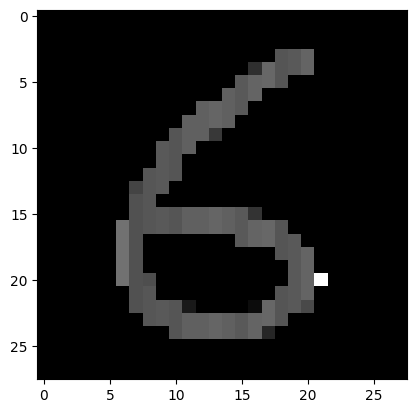

Corresponding label:6


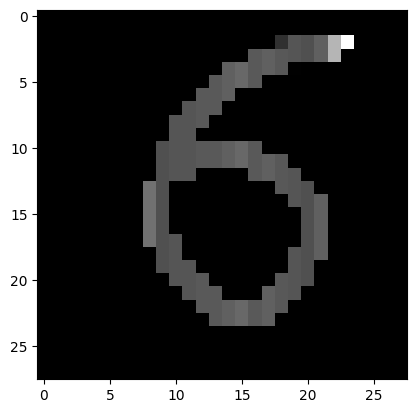

Corresponding label:6


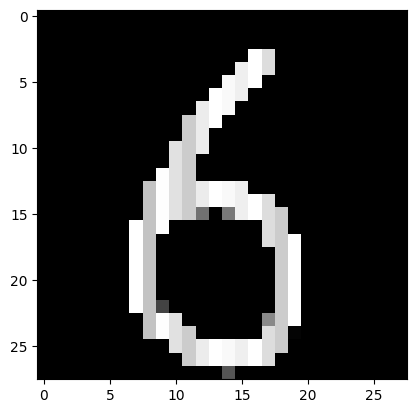

Corresponding label:6


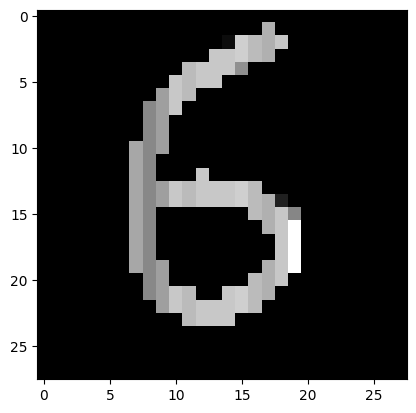

Corresponding label:6


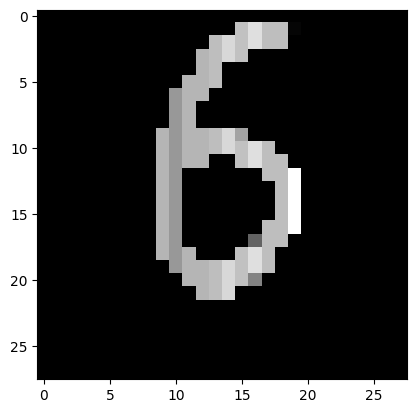

Corresponding label:6


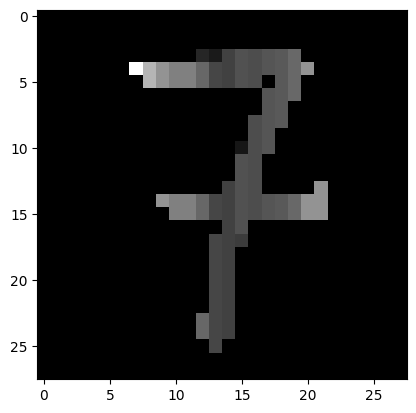

Corresponding label:7


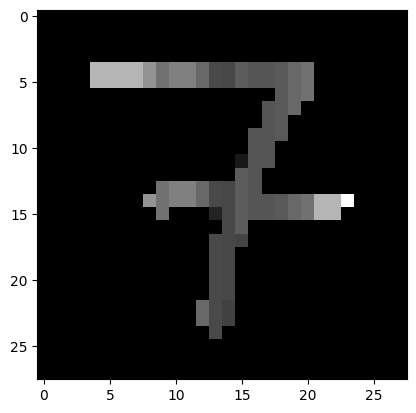

Corresponding label:7


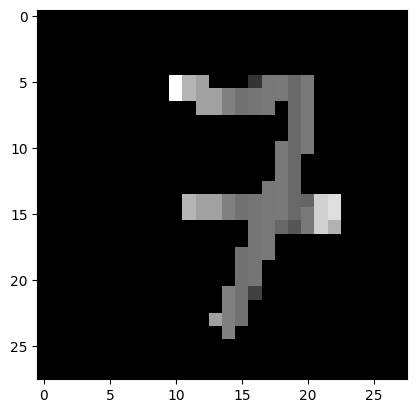

Corresponding label:7


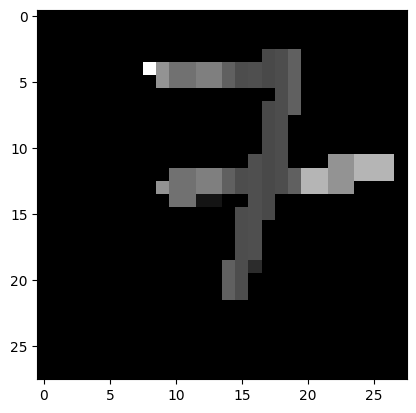

Corresponding label:7


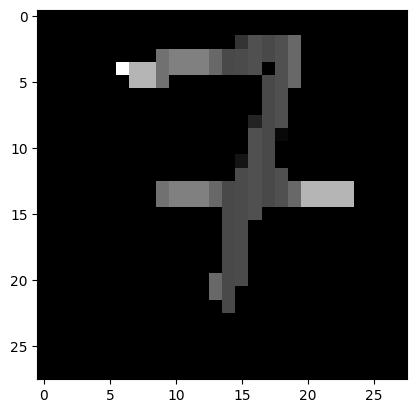

Corresponding label:7


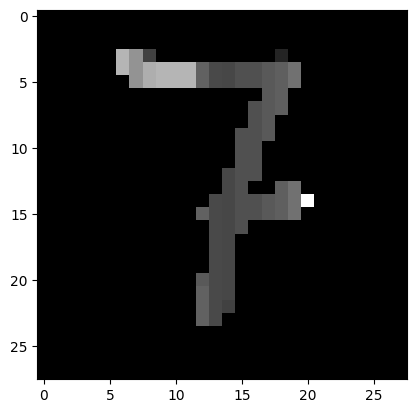

Corresponding label:7


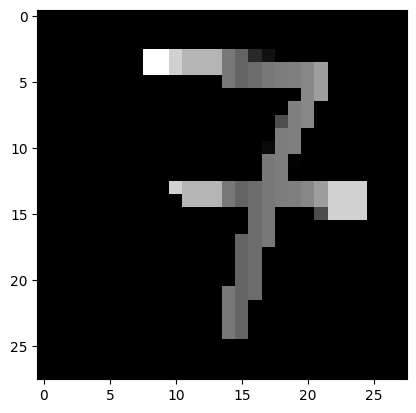

Corresponding label:7


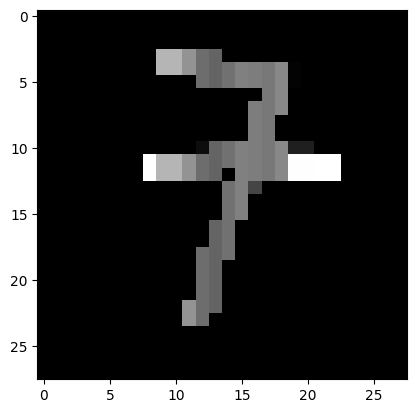

Corresponding label:7


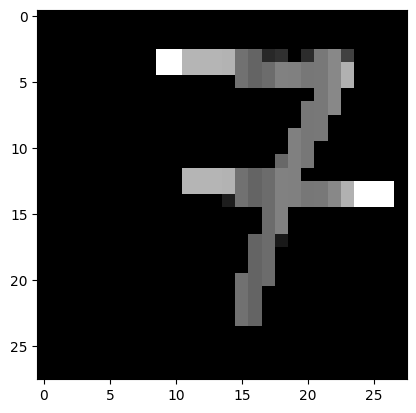

Corresponding label:7


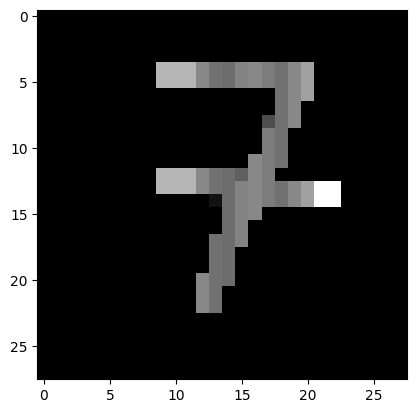

Corresponding label:7


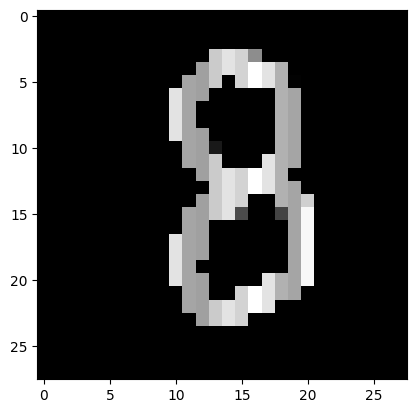

Corresponding label:8


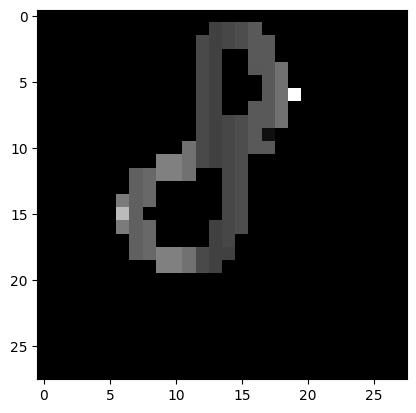

Corresponding label:8


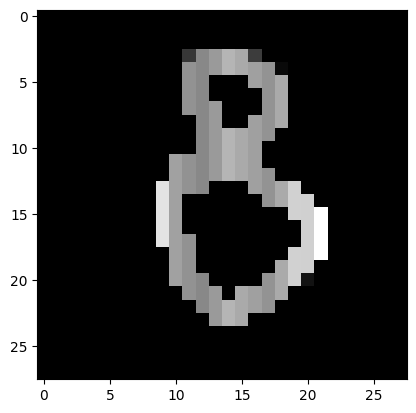

Corresponding label:8


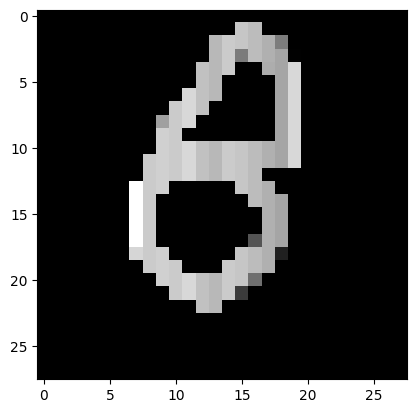

Corresponding label:8


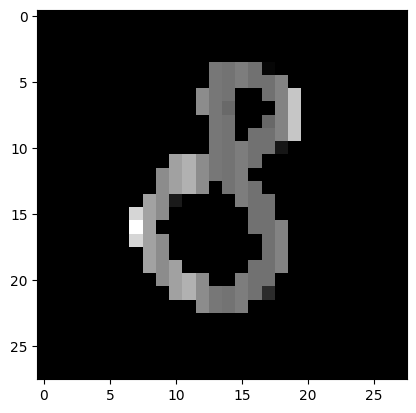

Corresponding label:8


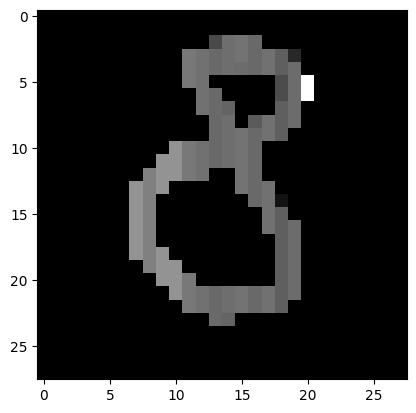

Corresponding label:8


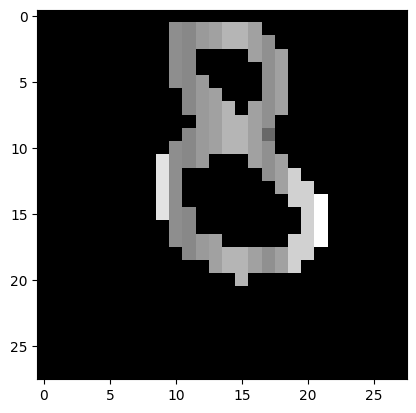

Corresponding label:8


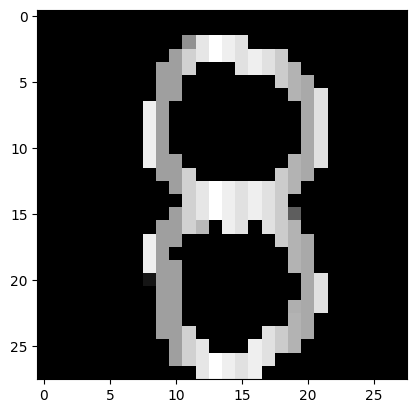

Corresponding label:8


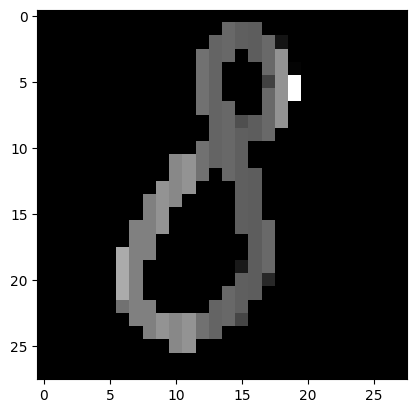

Corresponding label:8


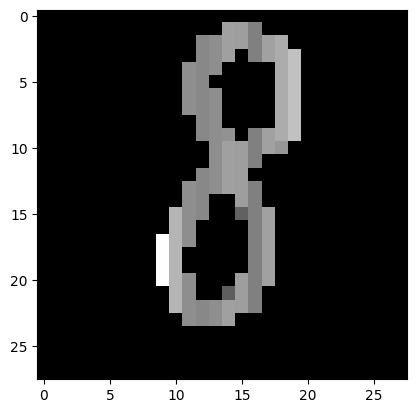

Corresponding label:8


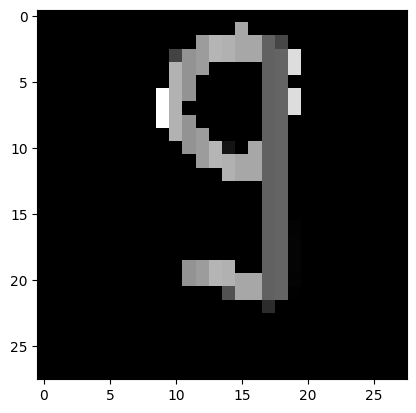

Corresponding label:9


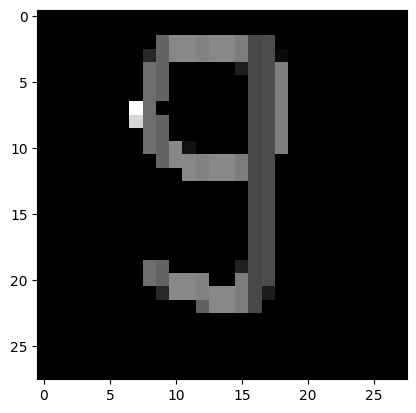

Corresponding label:9


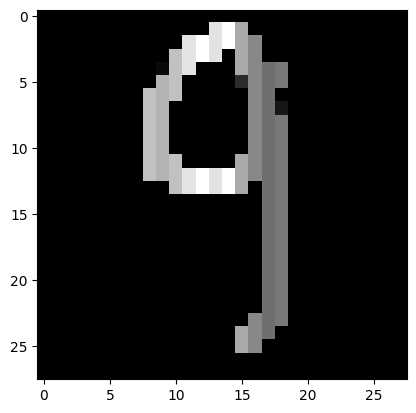

Corresponding label:9


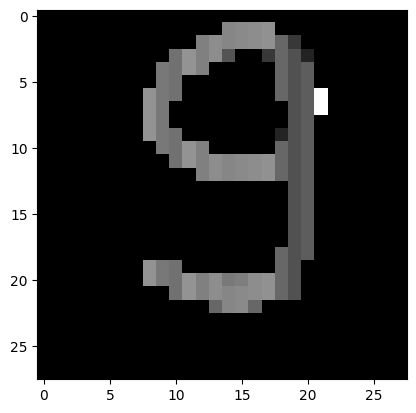

Corresponding label:9


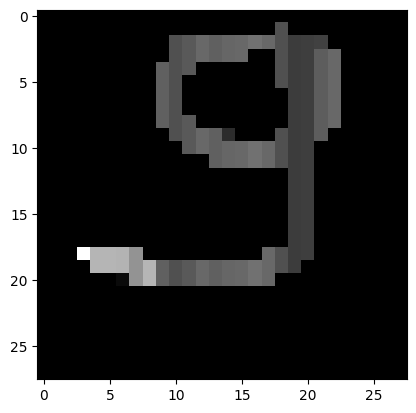

Corresponding label:9


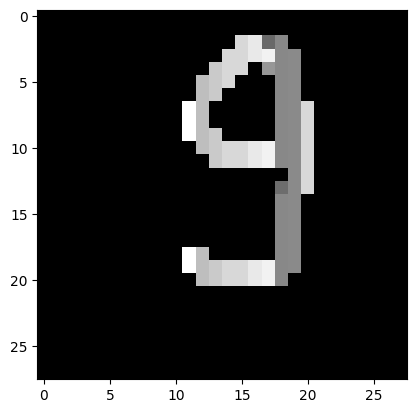

Corresponding label:9


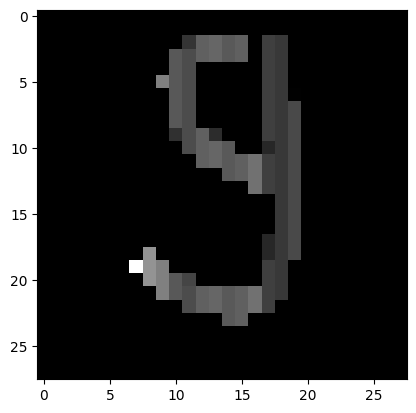

Corresponding label:9


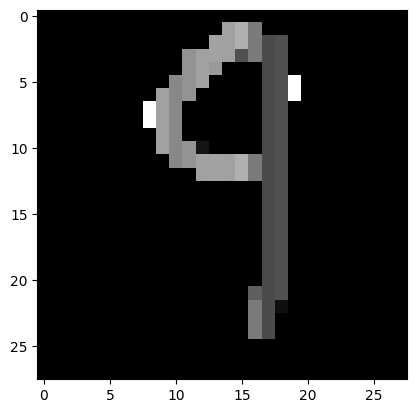

Corresponding label:9


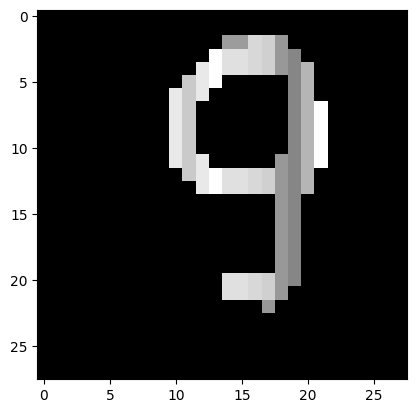

Corresponding label:9


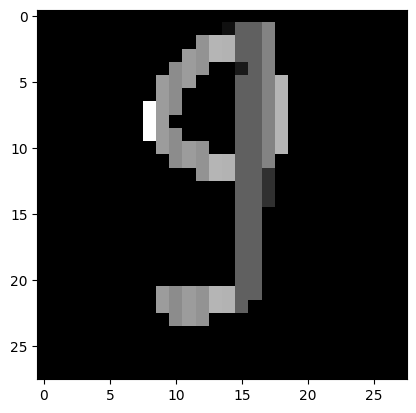

Corresponding label:9


In [36]:
for i in range(100):  
#     plt.subplot(330 + 1 + i)
    plt.imshow(x_train_custom[i], cmap=plt.get_cmap('gray'))
    plt.show()
    print(f"Corresponding label:{y_train_custom[i]}")

In [22]:
print(x_train_custom.shape)

(100, 28, 28, 1)
